<h3 style="color: #001a79;">Exercise</h3>

<hr style="border-top: 1px solid #001a79;" />

Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generating random data that will be close to linear when plotted
x_axis = np.arange(0.0, 26.0, 1.0)
y_axis = 2.0 * x_axis + 5 + np.random.normal(0.0, 2.5, x_axis.size)

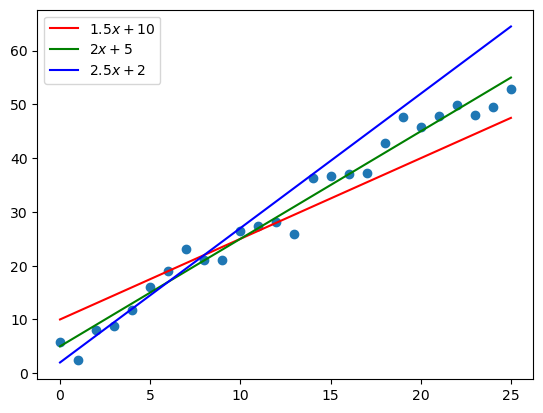

In [3]:
plt.plot(x_axis, y_axis, "o")

# Overlay some lines on the plot.
x = np.arange(0, 26.0, 1.0)

plt.plot(x, 1.5 * x + 10, 'r-', label=r"$1.5x + 10$")
plt.plot(x, 2 * x +  5.0, 'g-', label=r"$2x +  5$")
plt.plot(x, 2.5 * x + 2, 'b-', label=r"$2.5x + 2$")

# Add a legend.
plt.legend()

In [4]:
# Calculate the absolute value cost of the lines above for the data above.
# Code adapted from: https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/02-models.ipynb
cost = lambda m,c: np.sum([abs(y_axis[i] - m * (x_axis[i]) - c) for i in range(x_axis.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (1.5, 10.0, cost(1.5, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (2.0,  5.0, cost(2.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (2.5, 2.0, cost(2.5, 2.0)))

Cost with m =  1.50 and c = 10.00:   102.61
Cost with m =  2.00 and c =  5.00:    51.90
Cost with m =  2.50 and c =  2.00:   111.95


This calculation gives us a quantitative value as to the line that best fits the data. The value is the absolute sum of the distance between each point and the line. The lower the value is indicates that the points are closer to the line overall. Converting all values to their absolute value allows us to sum the distance regardless of whether a datapoint is above the fitted line or below the line. 

The absolute function is generally not preferred, however. One reason is that there are difficulties in performing calculus with absolute values [1]. With absolute values, we would need to continually draw lines and calculate which one is the best fit. Even then, we would not be sure if the best line we have is indeed the best fit, or whether another better line exists. Instead, using least squares instead goes some way to alleviating these issues. Absolute deviation calculations have an advantage over least squares when it comes to robustness, however, as least squares can be affected by outliers or extreme values[2].

<img src="https://i.stack.imgur.com/PKqDq.png" width="600"/>
[3]

References

1. https://www.bradthiessen.com/html5/docs/ols.pdf
2. https://en.wikipedia.org/wiki/Least_absolute_deviations
3. https://demonstrations.wolfram.com/ComparingLeastSquaresFitAndLeastAbsoluteDeviationsFit/


<h3 style="color: #001a79;">Exercise 2</h3>

<hr style="border-top: 1px solid #001a79;" />

Fit a straight line to the following data points, using all three methods used above(Numpy Polyfit, Scipy Optimize, Scipy Curve Fit).

Do you think a straight line is a good model for these points?

```python
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]
```

<hr style="border-top: 1px solid #001a79;" />

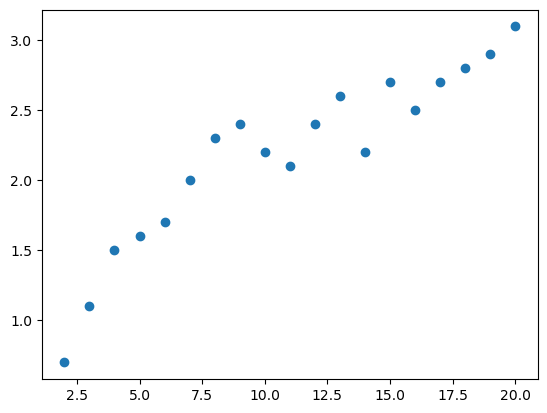

In [5]:
# Plot the provided data
# Converting to np arrays for easier calculations later on when plotting lines
x = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])
y = np.array([0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1])

plt.plot(x, y, "o")

Numpy Polyfit

In [6]:
# Using numpy polyfit to find the best m and c to fit a line to the plot
m_pf, c_pf = np.polyfit(x, y, 1)

# print result
m_pf, c_pf

(0.10315789473684217, 1.0494736842105254)

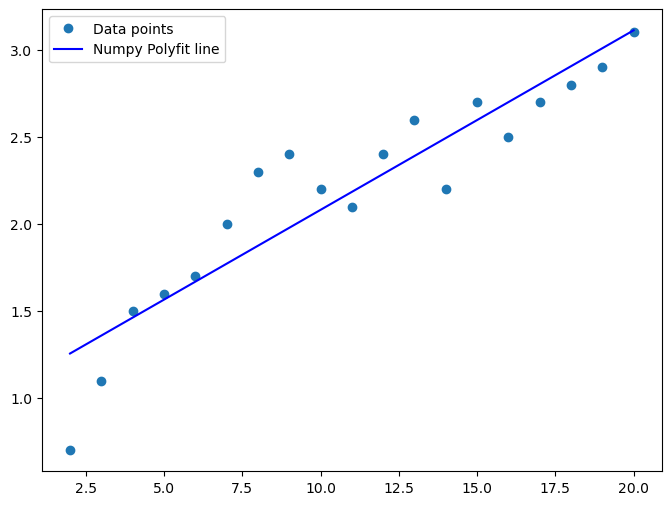

In [7]:
# Draw the line onto the plot
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'o', label='Data points')
ax.plot(x, m_pf * x + c_pf, 'b-', label='Numpy Polyfit line')
ax.legend()

Scipy Optimize

In [8]:
# Using scipy.optimize to find the line of best fit
import scipy.optimize as so

In [9]:
# A cost function that is required to pass into scipy.optimize
# Code from: https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/02-models.ipynb
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

In [10]:
# Getting m and c using scipy optimize
result = so.minimize(cost, (1.0, 1.0))
# Show the results.
result

      fun: 1.039578947369111
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([1.49011612e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [11]:
# Getting m and c from the result above
m_o, c_o = result.x
# Print m and c.
m_o, c_o

(0.1031578599623727, 1.0494740593222642)

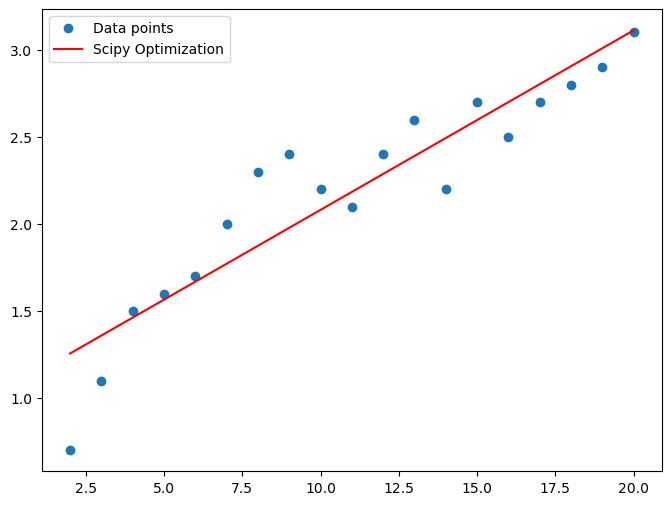

In [12]:
# Plotting result
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'o', label='Data points')
ax.plot(x, m_o * x + c_o, 'r-', label='Scipy Optimization')
ax.legend()

Scipy Curve Fit

In [13]:
# Using Scipy Curve Fit to find the line of best fit
# Create the model function. From https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/02-models.ipynb
def f(x, m, c):
    return m * x + c

In [14]:
# Using curve fit and the defined function to get m and c
result = so.curve_fit(f, x, y)

result

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [15]:
# Get m and c
m_cf, c_cf = result[0]
# Print values.
m_cf, c_cf

(0.10315789458399933, 1.0494736859688867)

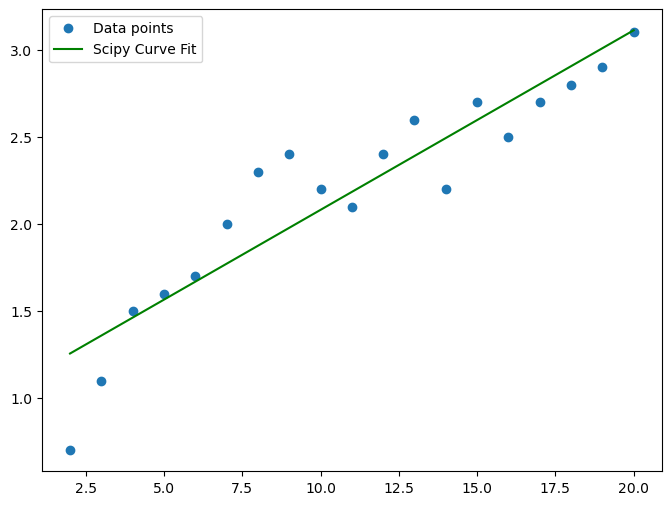

In [16]:
# Plotting result
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'o', label='Data points')
ax.plot(x, m_cf * x + c_cf, 'g-', label='Scipy Curve Fit')
ax.legend()

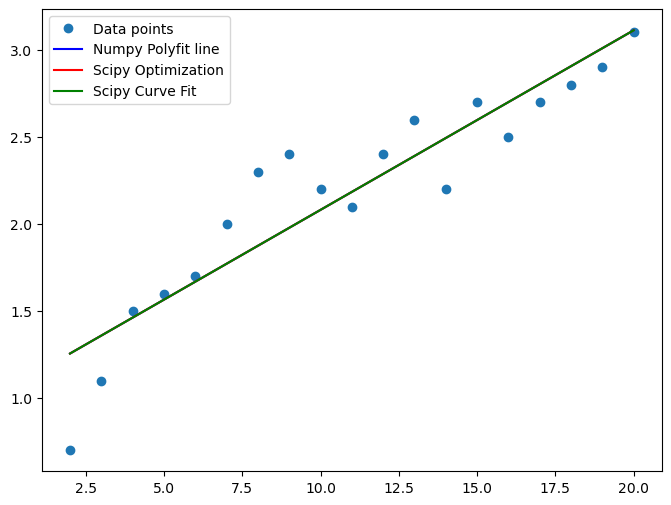

In [17]:
# Plotting all three at once
# Plotting result
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'o', label='Data points')
ax.plot(x, m_pf * x + c_pf, 'b-', label='Numpy Polyfit line')
ax.plot(x, m_o * x + c_o, 'r-', label='Scipy Optimization')
ax.plot(x, m_cf * x + c_cf, 'g-', label='Scipy Curve Fit')
ax.legend()

The three results agree so much it is impossible to distinguish the three lines on this plot. A straight line might not be ideal for this data as the two datapoints that are closest to the x and y axis intercept are quite far away from the line relative to the other datapoints. A curved line to account for these points may be better. 